In [16]:
# 📦 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [17]:
# 📄 2. Fungsi Load Data (Sama seperti di data_loader.py)
def load_clean_data():
    df = pd.read_csv('../data/processed/data_wisata_marge.csv')  # ganti dengan path file-mu
    df.dropna(subset=['Tahun', 'Tempat Wisata', 'Wilayah', 'Wisnus', 'Wisman'], inplace=True)
    df['Tahun'] = df['Tahun'].astype(int)
    df['Wisnus'] = df['Wisnus'].astype(int)
    df['Wisman'] = df['Wisman'].astype(int)
    return df


In [18]:
# 📊 3. Fungsi Analisis Tren Regresi (Sama seperti model.py)
def analisis_tren_regresi(df, target='Wisnus'):
    tempat_list = df['Tempat Wisata'].unique()
    hasil = []

    for tempat in tempat_list:
        data_tempat = df[df['Tempat Wisata'] == tempat]
        data_tahunan = data_tempat.groupby('Tahun')[target].sum().reset_index()

        X = data_tahunan['Tahun'].values.reshape(-1, 1)
        y = data_tahunan[target].values

        if len(X) < 2:
            continue

        model = LinearRegression()
        model.fit(X, y)
        coef = model.coef_[0]
        hasil.append({'Tempat Wisata': tempat, 'Koefisien Regresi': coef})

    return pd.DataFrame(hasil).sort_values(by='Koefisien Regresi', ascending=False)


In [19]:
# 📈 4. Fungsi Visualisasi (plot_regresi_by_tempat, wilayah, agregat) dan evaluasi
def plot_regresi_by_tempat(df, tempat_wisata, target='Wisnus'):
    data_tempat = df[df['Tempat Wisata'] == tempat_wisata]
    data_tahunan = data_tempat.groupby('Tahun')[target].sum().reset_index()
    X = data_tahunan['Tahun'].values.reshape(-1, 1)
    y = data_tahunan[target].values

    if len(X) < 2:
        print(f"Data untuk tempat wisata {tempat_wisata} kurang dari 2 tahun.")
        return

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure()
    plt.plot(data_tahunan['Tahun'], y, marker='o', label='Total Tahunan')
    plt.plot(data_tahunan['Tahun'], y_pred, 'r--', label='Regresi')
    plt.title(f'Tren {target} untuk {tempat_wisata}')
    plt.xlabel('Tahun')
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_regresi_by_wilayah(df, target='Wisnus'):
    wilayah_list = df['Wilayah'].unique()
    for wilayah in wilayah_list:
        data_wilayah = df[df['Wilayah'] == wilayah]
        data_tahunan = data_wilayah.groupby('Tahun')[target].sum().reset_index()
        X = data_tahunan['Tahun'].values.reshape(-1, 1)
        y = data_tahunan[target].values

        if len(X) < 2:
            continue

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        plt.figure()
        plt.plot(data_tahunan['Tahun'], y, marker='o', label='Total Tahunan')
        plt.plot(data_tahunan['Tahun'], y_pred, 'r--', label='Regresi')
        plt.title(f'Tren {target} Wilayah {wilayah}')
        plt.xlabel('Tahun')
        plt.ylabel(target)
        plt.legend()
        plt.tight_layout()
        plt.show()


def plot_tren_aggregat(df, target='Wisnus'):
    df_sum = df.groupby('Tahun')[target].sum().reset_index()
    X = df_sum['Tahun'].values.reshape(-1, 1)
    y = df_sum[target].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(8, 5))
    sns.lineplot(x='Tahun', y=target, data=df_sum, marker='o', label='Total Tahunan')
    plt.plot(df_sum['Tahun'], y_pred, 'r--', label='Regresi')
    plt.title(f'Tren Total {target} Seluruh Tempat Wisata')
    plt.xlabel('Tahun')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def evaluate_regression_aggregate(df, target='Wisnus'):
    df_sum = df.groupby('Tahun')[target].sum().reset_index()
    X = df_sum['Tahun'].values.reshape(-1, 1)
    y = df_sum[target].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    print(f"Evaluasi Regresi untuk Total {target}")
    print(f"R² Score     : {r2:.2f}")
    print(f"MAE          : {mae:.2f}")
    print(f"MSE          : {mse:.2f}")
    print(f"RMSE         : {rmse:.2f}")


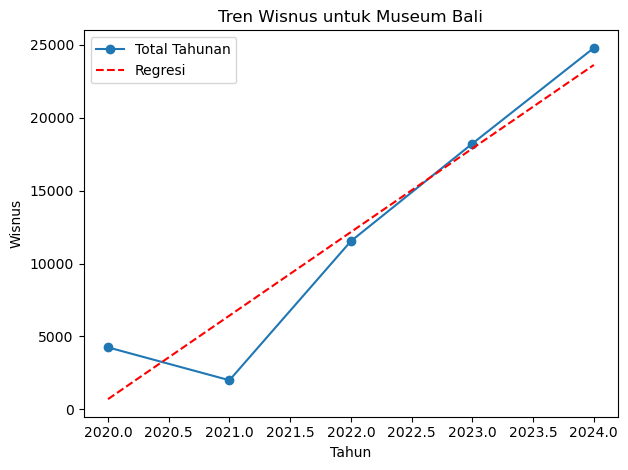

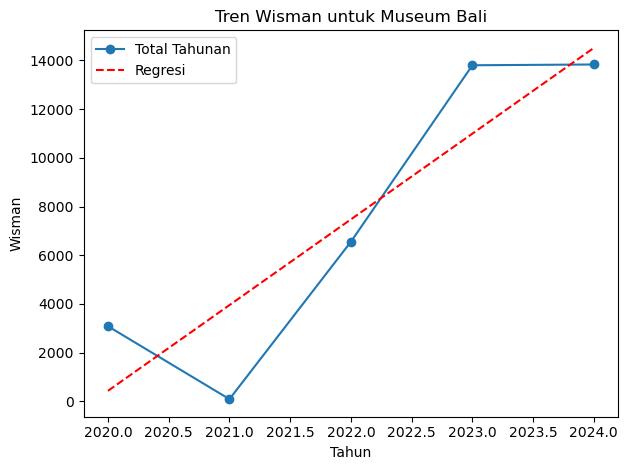

Tren Wisnus:


,Tempat Wisata,Koefisien Regresi
199,Tanah Lot,394391.4
82,Kawasan Nusa Penida,336720.2
47,Pantai Pandawa,313814.1
79,Desa Penglipuran,262947.1
14,Pantai Matahari Terbit Dan Bali Beach,125454.4



Tren Wisman:


,Tempat Wisata,Koefisien Regresi
45,Uluwatu,328920.7
55,Mandala Suci Wanara Wana,264379.2
54,Tirta Empul,214178.7
199,Tanah Lot,203495.1
48,Pantai Labuan Sait,95793.2


In [20]:
# ▶️ 5. Eksekusi Main Analysis
df = load_clean_data()

# Analisis tren per tempat
tren_wisnus = analisis_tren_regresi(df, target='Wisnus')
tren_wisman = analisis_tren_regresi(df, target='Wisman')

# Visualisasi tempat tertentu
plot_regresi_by_tempat(df, tempat_wisata='Museum Bali', target='Wisnus')
plot_regresi_by_tempat(df, tempat_wisata='Museum Bali', target='Wisman')

# Lihat hasil tren
print("Tren Wisnus:")
display(tren_wisnus.head())
print("\nTren Wisman:")
display(tren_wisman.head())


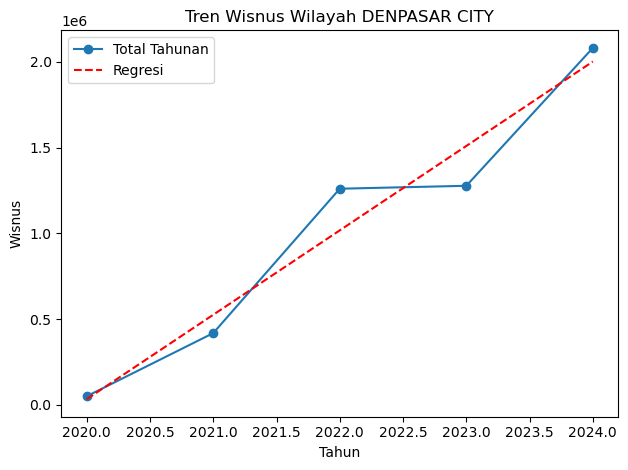

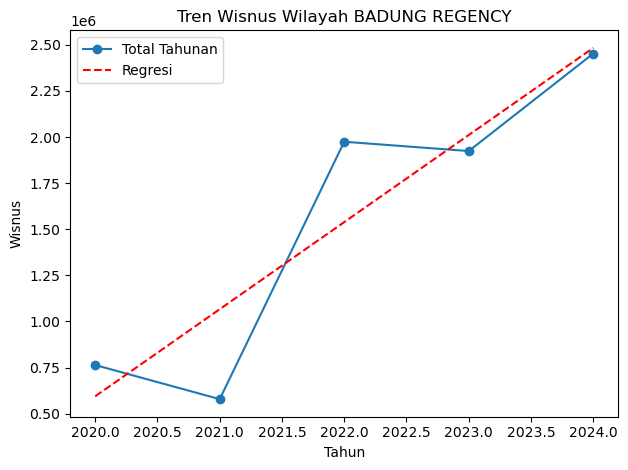

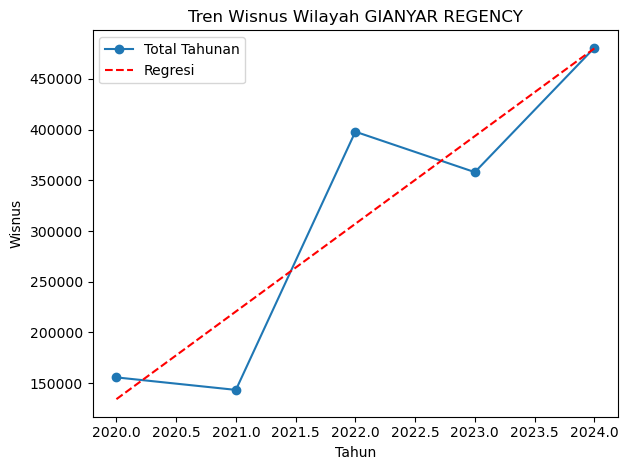

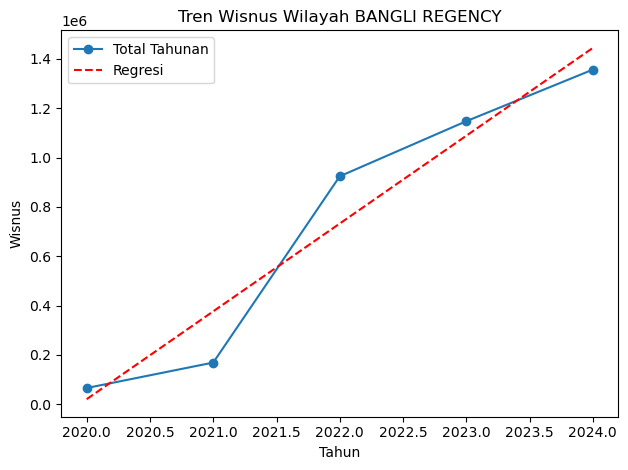

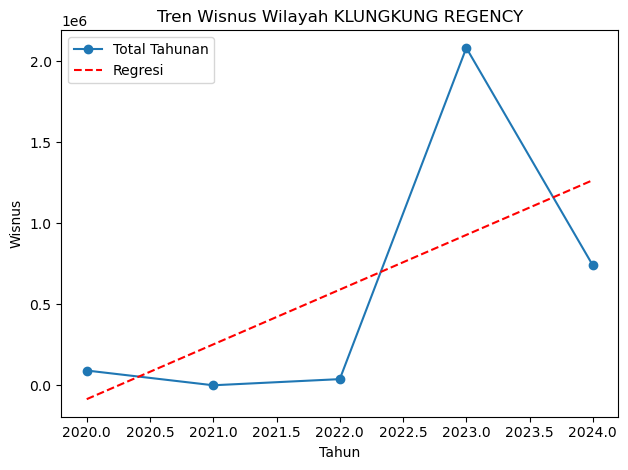

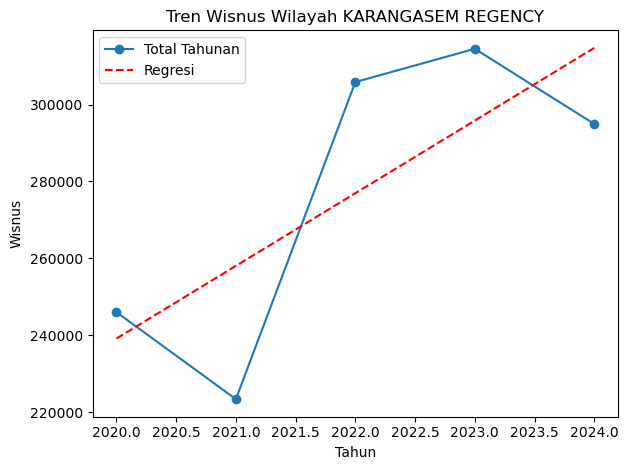

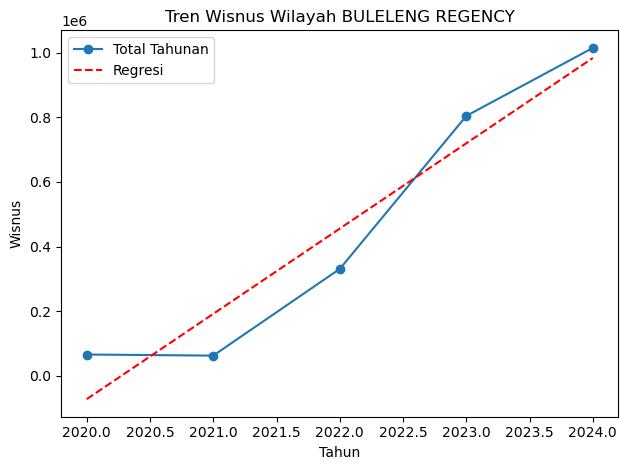

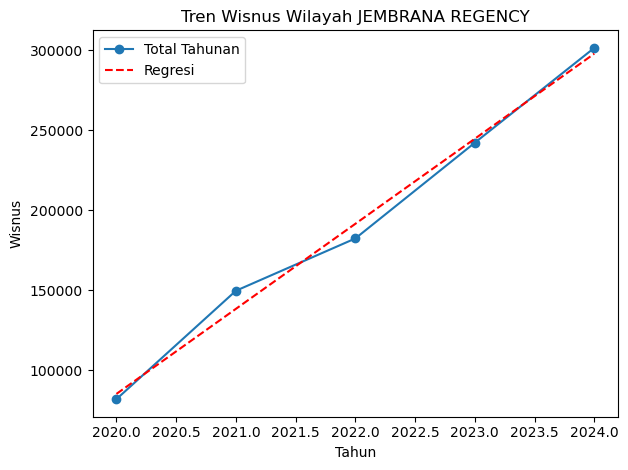

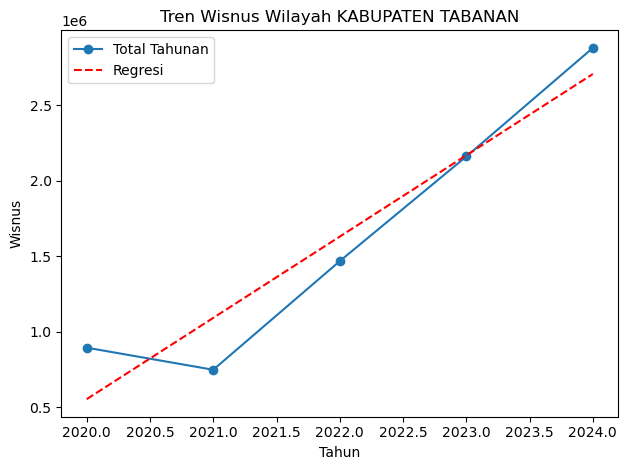

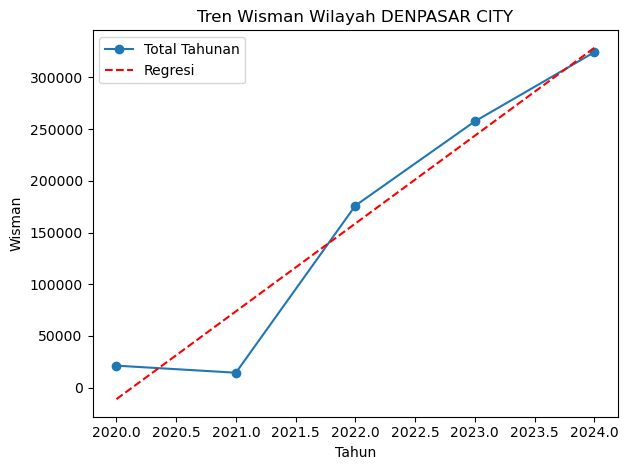

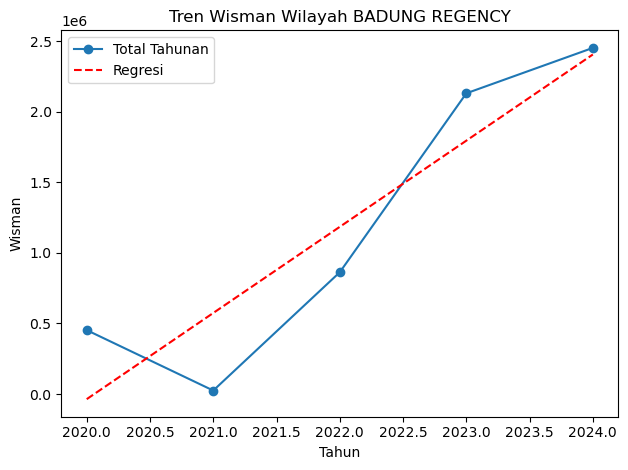

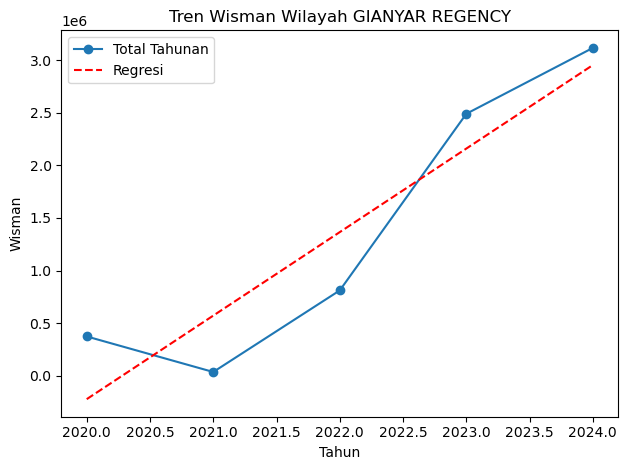

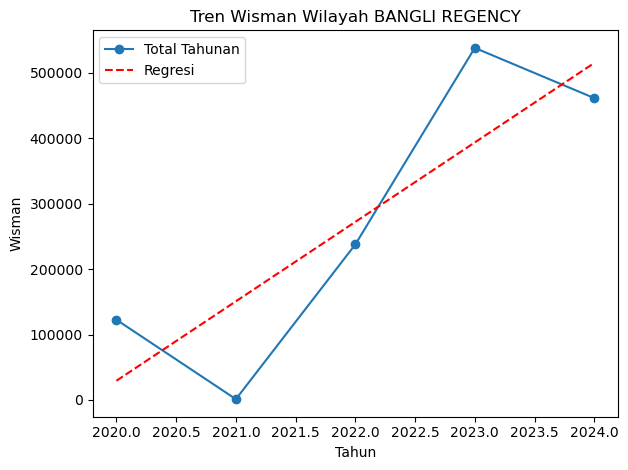

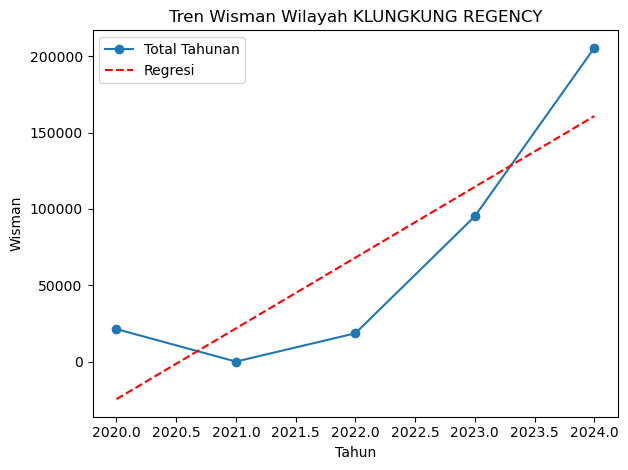

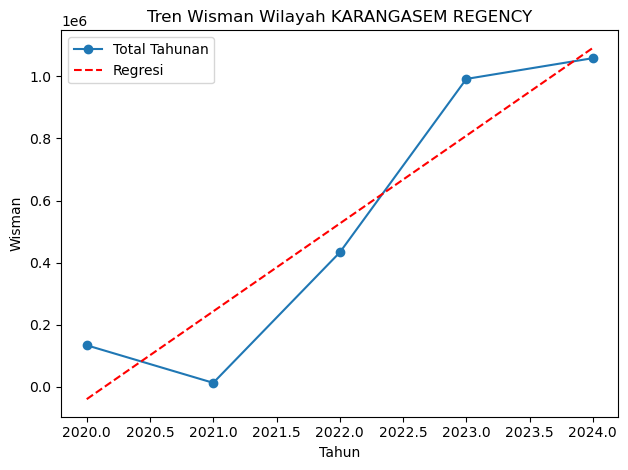

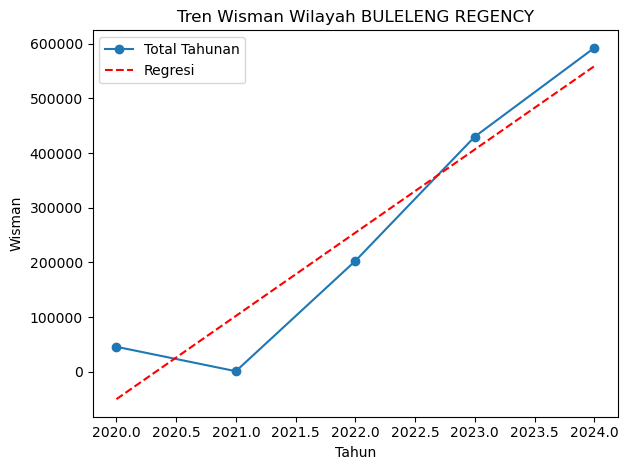

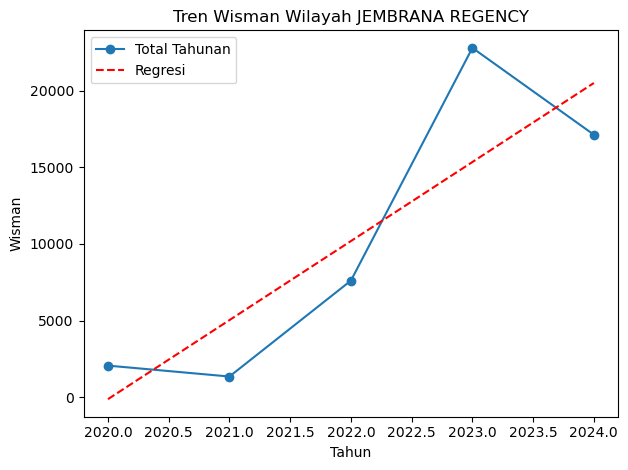

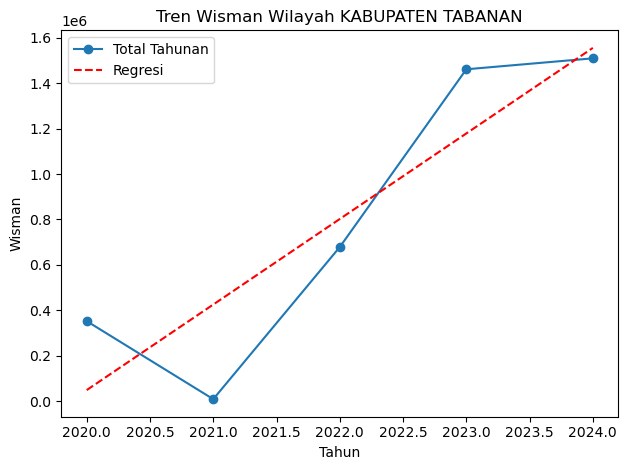

In [21]:
# 🌍 6. Visualisasi Per Wilayah
plot_regresi_by_wilayah(df, target='Wisnus')
plot_regresi_by_wilayah(df, target='Wisman')


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


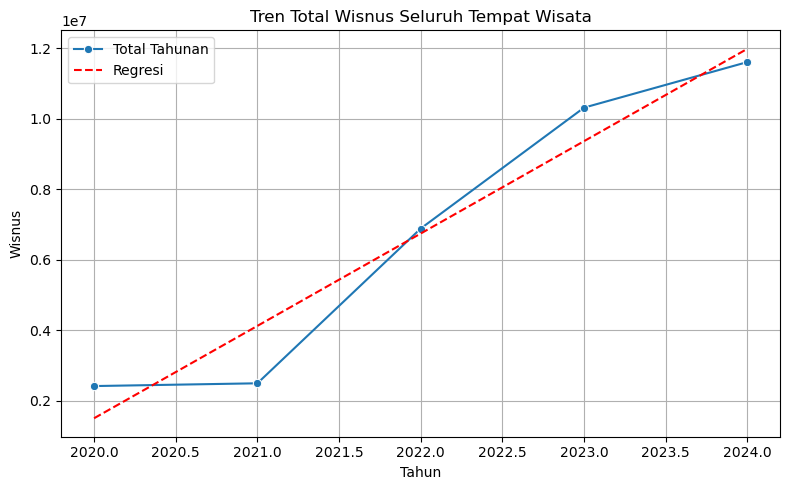

c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Evaluasi Regresi untuk Total Wisnus
R² Score     : 0.94
MAE          : 801874.88
MSE          : 909956125191.47
RMSE         : 953916.20


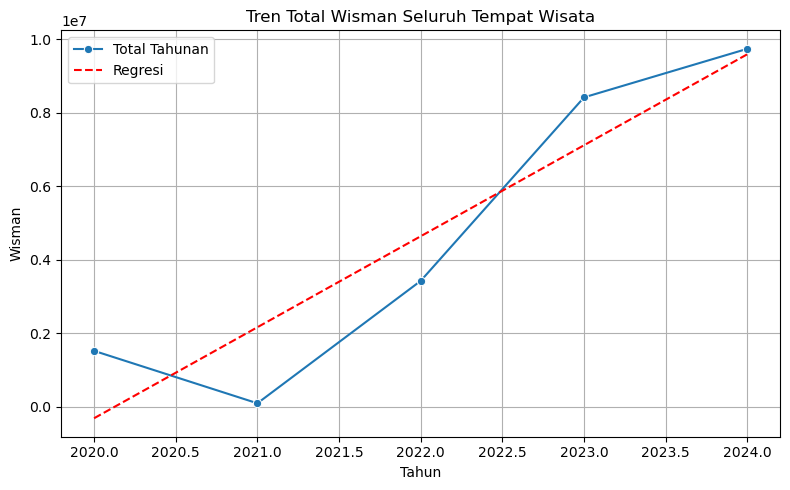

Evaluasi Regresi untuk Total Wisman
R² Score     : 0.85
MAE          : 1312224.76
MSE          : 2163086632965.08
RMSE         : 1470743.56


In [22]:
# 📊 7. Visualisasi Agregat dan Evaluasi
plot_tren_aggregat(df, target='Wisnus')
evaluate_regression_aggregate(df, target='Wisnus')

plot_tren_aggregat(df, target='Wisman')
evaluate_regression_aggregate(df, target='Wisman')
